<!-- Tasks

- Comments
- Reformatting -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random

<h1> Exercise 7: Simulated Annealing

<h3> (1) Travelling Salesman with Random Coordinates

The travelling salesman problem concerns finding the optimal path for some salesman, given a number of locations. These locations has a distance (or rather a cost) between them. Thus, functions for generating locations and costs are needed. Additionally, to implement simulated annealing some form of route-permutation is needed for each simulation. In this case, two locations (which are not the start/end location) are randomly switched (note that start/end can be included depending on the assumptions) - this can be seen as a "neighbor-route. Finally, a cooling function is required to to make the algorithm converge. This could be many decreasing functions - but the performance could depend on the choice. 1/sqrt(1-k) seems to work well.

In [2]:
#generates random coordinates for an enumerated list of locations.
def random_coordinates(X):
    C= np.random.randint(0,100+1,[len(X)-1,2]).tolist()
    C.insert(X[-1],C[X[-1]])
    return np.array(C)

#Computes the cost of a route (total euclidean distance)
def CostEuclid(route,coord):
    dist = [ np.sqrt( (coord[route[N+1] ,0] - coord[route[N] ,0])**2 + (coord[route[N+1] ,1] - coord[route[N] ,1])**2)  for N in range(len(route)-1)]
    return np.sum(dist)


def random_neighbor(state):
    a = np.array(state)
    r1,r2 = np.random.randint(1, len(state)-2, 2)
    a[r1],a[r2] = a[r2],a[r1]
    return a

#Cooling scheme
def cool(k):
    return 1/np.sqrt(1+k)
    #return 1/ np.log(k+1)
    #return - np.log(k+1)


The simulation can now be implemented. The initial route and all route costs are tracked.


In [30]:

#initial random solution with 20 stations
X = np.array(range(20))
random.shuffle(X) #randomize starting route

X = np.concatenate([X,[X[0]]])
init_X = X

#making coordinates and costs
XC = random_coordinates(X)
U = CostEuclid(X,XC)

n = 100000#number of simulations

cost_tracker = np.zeros(n)


kc = 0
ks = 0.0001
for k in range(n):
    T = cool(kc)
    X_candidate = random_neighbor(X)
    
    
    U_candidate = CostEuclid(X_candidate,XC)
    
    if U_candidate < U:
        X = X_candidate
        U = U_candidate
    elif np.exp(-(U_candidate-U)/T ) > random.random():
        #print(np.exp(-(U_candidate-U)/T ))
        X = X_candidate
        U = U_candidate
    cost_tracker[k] = U
    kc = kc+ks#+0.005

Plots of cost progression, initial route and final route are shown below.

Optimal Route:  [ 5 12  1  2 10  0 13 15 11 18 14  3 19  8 17  4 16  6  7  9  5]


Text(0.5, 1.0, 'Final Route')

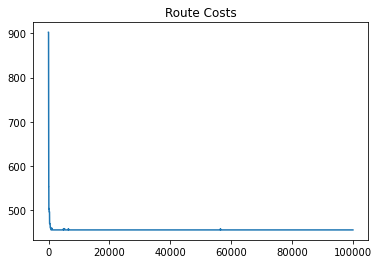

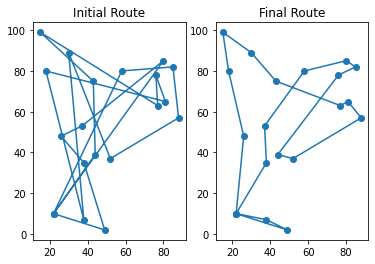

In [31]:
#optimal route
print("Optimal Route: ", X)

#plots
plt.figure()
plt.plot(cost_tracker)
plt.title("Route Costs")

plt.figure()
plt.subplot(1,2,1)
plt.scatter(XC[init_X][:,0],XC[init_X][:,1])
plt.plot(XC[init_X][:,0],XC[init_X][:,1])
plt.title("Initial Route")

plt.subplot(1,2,2)
plt.scatter(XC[X][:,0],XC[X][:,1])
plt.plot(XC[X][:,0],XC[X][:,1])
plt.title("Final Route")


It can be observed that the route goes from completely random to an optimal (or near optimal) solution. With more simulations (n) the chance of finding the true optimal solution increases. From the route costs it can be seen that the algorithm converges fast, but sometimes some fluctuations can be seen, which entails that a worse route is accepted ( with the intention of escaping local minima. The probability of these fluctuations changes depending on the cooling constant (kc).


<h3> (2) Travelling Salesman with Costs

The code can easily be extended to use the given cost matrix instead of the euclidean distance.

Optimal route:  [12  3  5 11  4  7 15  9  8 13  0  6 17 16 10 19  2  1 14 18 12]


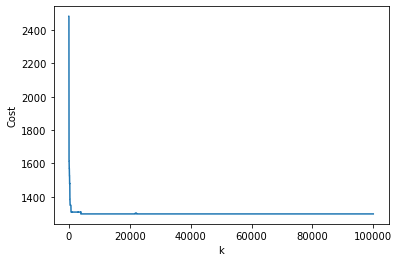

In [28]:
#importing Travelling Salesman Matrix
#df = pd.read_csv(os.path.join(os.getcwd(), '../filip', 'cost.csv'), header = None)
df = pd.read_csv(os.path.join(os.getcwd(), 'cost.csv'), header = None)
TSM = df.to_numpy()

def cost(route):
    c = 0
    for k in range(len(route)-1):
        c += TSM[route[k],route[k+1]]
    return c


#simulation
#initial random solution
init = np.array(range(len(TSM)))
random.shuffle(init) #randomize starting route

init = np.concatenate([init,[init[0]]])
#print(init)
init_cost = cost(init)


n = 100000#number of simulations
X = init
U = cost(X)

cost_tracker = np.zeros(n)


kc = 0
ks = 0.0001

for k in range(n):
    T = cool(kc)
    X_candidate = random_neighbor(X)
    U_candidate = cost(X_candidate)
    
    if U_candidate < U:
        X = X_candidate
        U = U_candidate
    elif np.exp(-(U_candidate-U)/T ) > random.random():
        #print(np.exp(-(U_candidate-U)/T ))
        X = X_candidate
        U = U_candidate
    cost_tracker[k] = U
    kc = kc + ks #+0.005

#plot
plt.figure()
plt.plot(range(n),cost_tracker,marker=' ')
plt.xlabel('k')
plt.ylabel('Cost')


#chosen route: 
print("Optimal route: ", X)

Again, the costs can be seen to converge towards an optimal solution. In conclusion, an optimisation problem can relatively easily be solved to (near) optimality using simulated annealing.